# The Poetry Project

Ever since I was a teenager I wrote poetry. When I started to learn about data analytics I wanted to find out what has an impact on  my creativity. Is the weather a factor? Does it matter what else I did during the day? Do other activities like reading or listening to music fuel my creativity? I collected almost three months of data about myself and the poetry I wrote. The data dates from August 6th, 2021 to November 4th, 2021.

### Contents of this notebook
#### 1. Importing libraries
#### 2. Importing dataset
#### 3. Cleaning the data
#### 4. Poem text analysis
#### 5. Wordcloud
#### 6. Exporting the datatframe

### 1. Importing libraries

In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import textblob

### 2. Importing dataset

In [27]:
poetry = pd.read_excel(r'C:\Users\veren\Python Data\persoenliche-projekte\The Poetry Project\02 Data\Original Data\poetry-project-data.xlsx')

In [28]:
poetry.shape

(91, 18)

In [29]:
# This is the whole original data set

pd.options.display.max_rows = None
poetry.head(91)

,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,Guitar,Reading,Type of reading,Mood in the evening,sleep quality night before,mindfulness,poem,additional poem 1,additional poem 2
0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,0,0.0,0,1,0,1,It slithers\nLeaves from my chest\nWhen the su...,0,0
1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,0,30.0,biographical,5,0,10,The touch of your skin\nIs a meandering\nFores...,The night sky is lingering \nOver the chest of...,Let me blow the horn of vastness \nFor you and...
2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,0,0.0,0,10,0,10,0,0,0
3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,0,0.0,0,0,0,10,0,0,0
4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,0,0.0,NaN,5,0,10,The deep yearning\nto learn something about yo...,0,0
5,2021-08-11,Wednesday,cloudy,fresh,0.0,60,0,20,NaN,0,0.0,0,5,0,10,Did I see an I\nWhere you used to be?\nA tranq...,0,0
6,2021-08-12,Thursday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,I didn't know\nI could miss \nsomebody\nI bare...,0,0
7,2021-08-13,Friday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,0,0,0
8,2021-08-14,Saturday,sunny,convenience,10.0,30,0,0,0,0,0.0,0,1,0,10,0,0,0
9,2021-08-15,Sunday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,1,0,1,I don't want to be\nan obedient woman\nanymore...,0,0


### 3. Cleaning the data

In [30]:
poetry['poem'].replace('\n',' ',inplace=True)

In [31]:
poetry.head(91)

,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,Guitar,Reading,Type of reading,Mood in the evening,sleep quality night before,mindfulness,poem,additional poem 1,additional poem 2
0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,0,0.0,0,1,0,1,It slithers\nLeaves from my chest\nWhen the su...,0,0
1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,0,30.0,biographical,5,0,10,The touch of your skin\nIs a meandering\nFores...,The night sky is lingering \nOver the chest of...,Let me blow the horn of vastness \nFor you and...
2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,0,0.0,0,10,0,10,0,0,0
3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,0,0.0,0,0,0,10,0,0,0
4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,0,0.0,NaN,5,0,10,The deep yearning\nto learn something about yo...,0,0
5,2021-08-11,Wednesday,cloudy,fresh,0.0,60,0,20,NaN,0,0.0,0,5,0,10,Did I see an I\nWhere you used to be?\nA tranq...,0,0
6,2021-08-12,Thursday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,I didn't know\nI could miss \nsomebody\nI bare...,0,0
7,2021-08-13,Friday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,0,0,0
8,2021-08-14,Saturday,sunny,convenience,10.0,30,0,0,0,0,0.0,0,1,0,10,0,0,0
9,2021-08-15,Sunday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,1,0,1,I don't want to be\nan obedient woman\nanymore...,0,0


As you can see, pandas imports the poetry from the Excel file in a way that puts a \n wherever there is a line break. We want to get rid of that.

In [32]:
# Creating a new column "cleaned poem" without the backlash 

poetry['cleaned poem'] = poetry['poem'].replace(r'\n',' ', regex=True) 

In [33]:
poetry.head(15)

,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,Guitar,Reading,Type of reading,Mood in the evening,sleep quality night before,mindfulness,poem,additional poem 1,additional poem 2,cleaned poem
0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,0,0.0,0,1,0,1,It slithers\nLeaves from my chest\nWhen the su...,0,0,It slithers Leaves from my chest When the sun ...
1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,0,30.0,biographical,5,0,10,The touch of your skin\nIs a meandering\nFores...,The night sky is lingering \nOver the chest of...,Let me blow the horn of vastness \nFor you and...,The touch of your skin Is a meandering Forest ...
2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,0,0.0,0,10,0,10,0,0,0,0
3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,0,0.0,0,0,0,10,0,0,0,0
4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,0,0.0,NaN,5,0,10,The deep yearning\nto learn something about yo...,0,0,The deep yearning to learn something about you...
5,2021-08-11,Wednesday,cloudy,fresh,0.0,60,0,20,NaN,0,0.0,0,5,0,10,Did I see an I\nWhere you used to be?\nA tranq...,0,0,Did I see an I Where you used to be? A tranqui...
6,2021-08-12,Thursday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,I didn't know\nI could miss \nsomebody\nI bare...,0,0,I didn't know I could miss somebody I barely ...
7,2021-08-13,Friday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,0,0,0,0
8,2021-08-14,Saturday,sunny,convenience,10.0,30,0,0,0,0,0.0,0,1,0,10,0,0,0,0
9,2021-08-15,Sunday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,1,0,1,I don't want to be\nan obedient woman\nanymore...,0,0,I don't want to be an obedient woman anymore I...


In [34]:
# Doing the same thing for the columns "additional poem 1" and "additional poem 2"

poetry['cleaned additional poem 1'] = poetry['additional poem 1'].replace(r'\n',' ', regex=True) 

In [35]:
poetry['cleaned additional poem 2'] = poetry['additional poem 2'].replace(r'\n',' ', regex=True) 

In [36]:
# Checking the head again

poetry.head(15)

,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,Guitar,Reading,Type of reading,Mood in the evening,sleep quality night before,mindfulness,poem,additional poem 1,additional poem 2,cleaned poem,cleaned additional poem 1,cleaned additional poem 2
0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,0,0.0,0,1,0,1,It slithers\nLeaves from my chest\nWhen the su...,0,0,It slithers Leaves from my chest When the sun ...,0,0
1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,0,30.0,biographical,5,0,10,The touch of your skin\nIs a meandering\nFores...,The night sky is lingering \nOver the chest of...,Let me blow the horn of vastness \nFor you and...,The touch of your skin Is a meandering Forest ...,The night sky is lingering Over the chest of ...,Let me blow the horn of vastness For you and ...
2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,0,0.0,0,10,0,10,0,0,0,0,0,0
3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,0,0.0,0,0,0,10,0,0,0,0,0,0
4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,0,0.0,NaN,5,0,10,The deep yearning\nto learn something about yo...,0,0,The deep yearning to learn something about you...,0,0
5,2021-08-11,Wednesday,cloudy,fresh,0.0,60,0,20,NaN,0,0.0,0,5,0,10,Did I see an I\nWhere you used to be?\nA tranq...,0,0,Did I see an I Where you used to be? A tranqui...,0,0
6,2021-08-12,Thursday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,I didn't know\nI could miss \nsomebody\nI bare...,0,0,I didn't know I could miss somebody I barely ...,0,0
7,2021-08-13,Friday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,0,0,0,0,0,0
8,2021-08-14,Saturday,sunny,convenience,10.0,30,0,0,0,0,0.0,0,1,0,10,0,0,0,0,0,0
9,2021-08-15,Sunday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,1,0,1,I don't want to be\nan obedient woman\nanymore...,0,0,I don't want to be an obedient woman anymore I...,0,0


Success!

### 4. Poem text analysis

In [37]:
# Counting the words in each of the poetry columns

poetry['totalwords poem'] = poetry['cleaned poem'].str.split().str.len()

In [38]:
poetry['totalwords additional poem 1'] = poetry['cleaned additional poem 1'].str.split().str.len()

In [39]:
poetry['totalwords additional poem 2'] = poetry['cleaned additional poem 2'].str.split().str.len()

In [40]:
poetry.head(91)

,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,Guitar,Reading,Type of reading,Mood in the evening,sleep quality night before,mindfulness,poem,additional poem 1,additional poem 2,cleaned poem,cleaned additional poem 1,cleaned additional poem 2,totalwords poem,totalwords additional poem 1,totalwords additional poem 2
0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,0,0.0,0,1,0,1,It slithers\nLeaves from my chest\nWhen the su...,0,0,It slithers Leaves from my chest When the sun ...,0,0,28.0,NaN,NaN
1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,0,30.0,biographical,5,0,10,The touch of your skin\nIs a meandering\nFores...,The night sky is lingering \nOver the chest of...,Let me blow the horn of vastness \nFor you and...,The touch of your skin Is a meandering Forest ...,The night sky is lingering Over the chest of ...,Let me blow the horn of vastness For you and ...,11.0,38.0,42.0
2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,0,0.0,0,10,0,10,0,0,0,0,0,0,NaN,NaN,NaN
3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,0,0.0,0,0,0,10,0,0,0,0,0,0,NaN,NaN,NaN
4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,0,0.0,NaN,5,0,10,The deep yearning\nto learn something about yo...,0,0,The deep yearning to learn something about you...,0,0,13.0,NaN,NaN
5,2021-08-11,Wednesday,cloudy,fresh,0.0,60,0,20,NaN,0,0.0,0,5,0,10,Did I see an I\nWhere you used to be?\nA tranq...,0,0,Did I see an I Where you used to be? A tranqui...,0,0,26.0,NaN,NaN
6,2021-08-12,Thursday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,I didn't know\nI could miss \nsomebody\nI bare...,0,0,I didn't know I could miss somebody I barely ...,0,0,18.0,NaN,NaN
7,2021-08-13,Friday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,0,0,0,0,0,0,NaN,NaN,NaN
8,2021-08-14,Saturday,sunny,convenience,10.0,30,0,0,0,0,0.0,0,1,0,10,0,0,0,0,0,0,NaN,NaN,NaN
9,2021-08-15,Sunday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,1,0,1,I don't want to be\nan obedient woman\nanymore...,0,0,I don't want to be an obedient woman anymore I...,0,0,24.0,NaN,NaN


In [41]:
poetry['totalwords poem'].fillna(0, inplace = True)
poetry['totalwords additional poem 1'].fillna(0, inplace = True)
poetry['totalwords additional poem 2'].fillna(0, inplace = True)

In [42]:
# To create a wordcloud later, I want to derive a column which holds all the poems of one day in one row

poetry['totalwords all poems'] = poetry['totalwords poem'] + poetry['totalwords additional poem 1'] + poetry['totalwords additional poem 2']

In [43]:
poetry['all poems together'] = poetry['cleaned poem'].astype(str) + ' ' + poetry['cleaned additional poem 1'].astype(str) + ' ' + poetry['cleaned additional poem 2'].astype(str)

In [44]:
pd.options.display.max_columns = None
poetry.head(91)

,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,Guitar,Reading,Type of reading,Mood in the evening,sleep quality night before,mindfulness,poem,additional poem 1,additional poem 2,cleaned poem,cleaned additional poem 1,cleaned additional poem 2,totalwords poem,totalwords additional poem 1,totalwords additional poem 2,totalwords all poems,all poems together
0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,0,0.0,0,1,0,1,It slithers\nLeaves from my chest\nWhen the su...,0,0,It slithers Leaves from my chest When the sun ...,0,0,28.0,0.0,0.0,28.0,It slithers Leaves from my chest When the sun ...
1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,0,30.0,biographical,5,0,10,The touch of your skin\nIs a meandering\nFores...,The night sky is lingering \nOver the chest of...,Let me blow the horn of vastness \nFor you and...,The touch of your skin Is a meandering Forest ...,The night sky is lingering Over the chest of ...,Let me blow the horn of vastness For you and ...,11.0,38.0,42.0,91.0,The touch of your skin Is a meandering Forest ...
2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,0,0.0,0,10,0,10,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 0 0
3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,0,0.0,0,0,0,10,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 0 0
4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,0,0.0,NaN,5,0,10,The deep yearning\nto learn something about yo...,0,0,The deep yearning to learn something about you...,0,0,13.0,0.0,0.0,13.0,The deep yearning to learn something about you...
5,2021-08-11,Wednesday,cloudy,fresh,0.0,60,0,20,NaN,0,0.0,0,5,0,10,Did I see an I\nWhere you used to be?\nA tranq...,0,0,Did I see an I Where you used to be? A tranqui...,0,0,26.0,0.0,0.0,26.0,Did I see an I Where you used to be? A tranqui...
6,2021-08-12,Thursday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,I didn't know\nI could miss \nsomebody\nI bare...,0,0,I didn't know I could miss somebody I barely ...,0,0,18.0,0.0,0.0,18.0,I didn't know I could miss somebody I barely ...
7,2021-08-13,Friday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 0 0
8,2021-08-14,Saturday,sunny,convenience,10.0,30,0,0,0,0,0.0,0,1,0,10,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 0 0
9,2021-08-15,Sunday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,1,0,1,I don't want to be\nan obedient woman\nanymore...,0,0,I don't want to be an obedient woman anymore I...,0,0,24.0,0.0,0.0,24.0,I don't want to be an obedient woman anymore I...


In [45]:
# deriving a column for the number of poems per day 

def no_of_poems_per_day (row):
    if str(row['cleaned additional poem 2']) != '0':
        return 3
    elif str(row['cleaned additional poem 1']) != '0':
        return 2
    elif str(row['cleaned poem']) != '0':
        return 1
    else : 
        return 0

In [46]:
poetry['no of poems per day'] = poetry.apply(lambda row: no_of_poems_per_day(row), axis = 1)

In [47]:
pd.options.display.max_columns = None
poetry.head(100)

,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,Guitar,Reading,Type of reading,Mood in the evening,sleep quality night before,mindfulness,poem,additional poem 1,additional poem 2,cleaned poem,cleaned additional poem 1,cleaned additional poem 2,totalwords poem,totalwords additional poem 1,totalwords additional poem 2,totalwords all poems,all poems together,no of poems per day
0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,0,0.0,0,1,0,1,It slithers\nLeaves from my chest\nWhen the su...,0,0,It slithers Leaves from my chest When the sun ...,0,0,28.0,0.0,0.0,28.0,It slithers Leaves from my chest When the sun ...,1
1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,0,30.0,biographical,5,0,10,The touch of your skin\nIs a meandering\nFores...,The night sky is lingering \nOver the chest of...,Let me blow the horn of vastness \nFor you and...,The touch of your skin Is a meandering Forest ...,The night sky is lingering Over the chest of ...,Let me blow the horn of vastness For you and ...,11.0,38.0,42.0,91.0,The touch of your skin Is a meandering Forest ...,3
2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,0,0.0,0,10,0,10,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 0 0,0
3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,0,0.0,0,0,0,10,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 0 0,0
4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,0,0.0,NaN,5,0,10,The deep yearning\nto learn something about yo...,0,0,The deep yearning to learn something about you...,0,0,13.0,0.0,0.0,13.0,The deep yearning to learn something about you...,1
5,2021-08-11,Wednesday,cloudy,fresh,0.0,60,0,20,NaN,0,0.0,0,5,0,10,Did I see an I\nWhere you used to be?\nA tranq...,0,0,Did I see an I Where you used to be? A tranqui...,0,0,26.0,0.0,0.0,26.0,Did I see an I Where you used to be? A tranqui...,1
6,2021-08-12,Thursday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,I didn't know\nI could miss \nsomebody\nI bare...,0,0,I didn't know I could miss somebody I barely ...,0,0,18.0,0.0,0.0,18.0,I didn't know I could miss somebody I barely ...,1
7,2021-08-13,Friday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,5,0,10,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 0 0,0
8,2021-08-14,Saturday,sunny,convenience,10.0,30,0,0,0,0,0.0,0,1,0,10,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 0 0,0
9,2021-08-15,Sunday,sunny,fresh,0.0,60,0,0,0,0,0.0,0,1,0,1,I don't want to be\nan obedient woman\nanymore...,0,0,I don't want to be an obedient woman anymore I...,0,0,24.0,0.0,0.0,24.0,I don't want to be an obedient woman anymore I...,1


### 5. Wordcloud

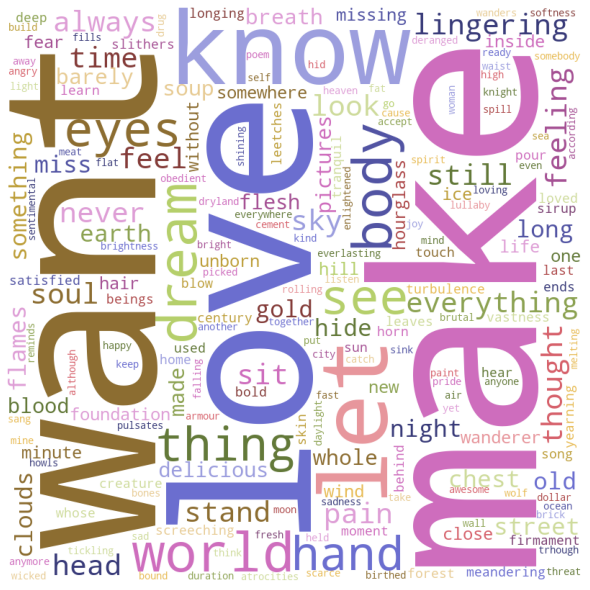

In [51]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the the newly derived column "all poems together"
for val in poetry['all poems together']:

    # typecaste each val to string
    val = str(val)
    
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()


     
    comment_words += " ".join(tokens)+" "
 
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = ['nan'] + list(STOPWORDS), #without this line some "nans" would show up in the cloud
                colormap='tab20b', #adding this line plots a different color scheme than "standard"
                min_font_size = 10).generate(comment_words)
 
    # plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### 6. Exporting the dataframe

In [49]:
# Creating a path

path = r'C:\Users\veren\Python Data\persoenliche-projekte\The Poetry Project'

In [50]:
poetry.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'poetry-project-data-complete.xlsx'))